In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

In [191]:
import find_flies_in_image_directory
reload(find_flies_in_image_directory)

from multi_tracker_analysis import read_hdf5_file_to_pandas as mta_read

Using open cv: 3.3.1
Open CV 3


## Set the directory to a valid path

In [183]:
directory = '/media/caveman/FastData/all_colors/20171220_162257_N1_gphoto2'

## Get a reduced size grayscale median image, for finding flies 

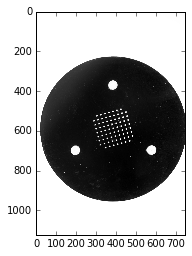

In [184]:
median = find_flies_in_image_directory.create_median_gray_small_image_from_directory(directory)

# show it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(median, cmap='gray')

## Get a reduced size grayscale image with a fly in it (hopefully)

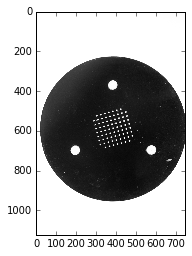

In [185]:
# get a list of all the fly images
file_list = mta_read.get_filenames(directory, '.jpg')

# load the first one
pixels_per_mm = 42
flyimg = find_flies_in_image_directory.FlyImg(directory, file_list[0], pixels_per_mm)
small_gray = flyimg.load_small_gray_image()

# show it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(small_gray, cmap='gray')

## Find some flies and show them

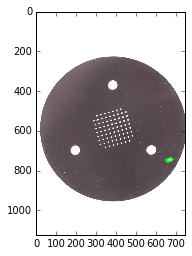

In [186]:
flyimg.find_flies(median)
flyimg.show_fly_ellipses()

## Get rois (region of interest) around each fly

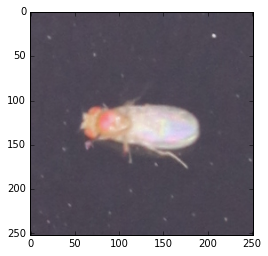

In [198]:
flyimg.load_rois_fly()
flyimg.show_rois()

## Get a full size color median image

In [155]:
median_large = find_flies_in_image_directory.create_median_image_from_directory(directory)

## Do all the above in function

In [194]:
def show_rois_for_image(n, directory, file_list, median):
    pixels_per_mm = 42
    flyimg = find_flies_in_image_directory.FlyImg(directory, file_list[n], pixels_per_mm)
    flyimg.find_flies(median)
    flyimg.load_rois_fly()
    flyimg.load_rois_median(median_large)
    flyimg.load_rois_isolated_fly()
    
    # show the results
    flyimg.show_rois()
    flyimg.show_rois(flyimg.rois_isolated_fly)
    
    return flyimg

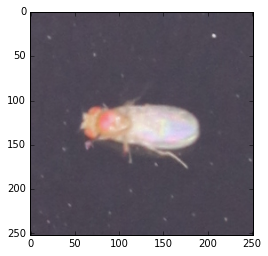

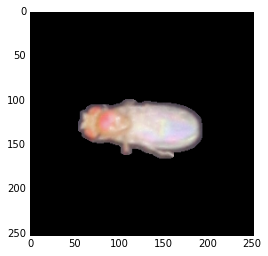

In [197]:
flyimg = show_rois_for_image(350, directory, file_list, median)